In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import os

In [8]:
# Load the data from the CSV file into a pandas DataFrame
data = pd.read_csv('Sub_Oil_VLCC_Monthly.csv')
data = data.iloc[1:, :]  # Delete the first row of the dataset

In [9]:
# Define a list of feature column names

columns = data.columns[1:]

features = ['542236', '67321', '549295', '41108', '541982']

In [10]:
#Hyperparameter for Ridge Regression
rr_hparams = {
    'alpha': 1,         # Regularization strength (higher values indicate stronger regularization)
    'solver': 'auto',   # Algorithm to use for optimization ('auto' automatically selects between solvers)
    'tol': 0.001,       # Tolerance for stopping criteria
    'max_iter': 50,     # Maximum number of iterations
}

# Hyperparameters for MLP
mlp_hparams = {
    'hidden_layer_sizes': (50, 50, 50),     # Sizes of hidden layers in the neural network
    'activation': 'relu',                   # Activation function for hidden layers
    #'solver': 'adam',                      # Algorithm to use for optimization  
    'max_iter': 50,                         # Maximum number of iterations
    #'verbose': 10,                         # Verbosity level
    'learning_rate_init': .1,               # Initial learning rate
}

# Hyperparameter for GRadient Boosting
gb_hparams = {
    'n_estimators': 100,    # Number of boosting stages
    'learning_rate': 0.1,   # Learning rate (shrinkage parameter)
}

# Hyperparameter for XGBoost
xgb_hparams = {
    'max_depth':6,              # Maximum depth of a tree
    'min_child_weight': 1,      # Minimum sum of instance weight (Hessian) needed in a child
    'eta':.3,                   # Step size shrinkage used in update to prevents overfitting
    'subsample': 1,             # Subsample ratio of the training instances
    'colsample_bytree': 1,      # Subsample ratio of columns when constructing each tree          
    'objective':'reg:linear',   # Learning task and objective function
    'random_state':42           # Seed for random number generation
}

In [11]:
# Models/Algorithms used
models = {
    'Ridge Regression': Ridge(**rr_hparams),
    'MLP': MLPRegressor(**mlp_hparams),
    'Gradient Boosting': GradientBoostingRegressor(**gb_hparams),
    'Random Forest': RandomForestRegressor(), #Default parameter
    'XGBoost': XGBRegressor(**xgb_hparams)
}

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:10:02] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Feature: 542236
Ridge Regression: Accuracy = 92.79%
MLP: Accuracy = 0.01%
Gradient Boosting: Accuracy = 93.01%
Random Forest: Accuracy = 92.90%
XGBoost: Accuracy = 92.69%


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:10:17] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


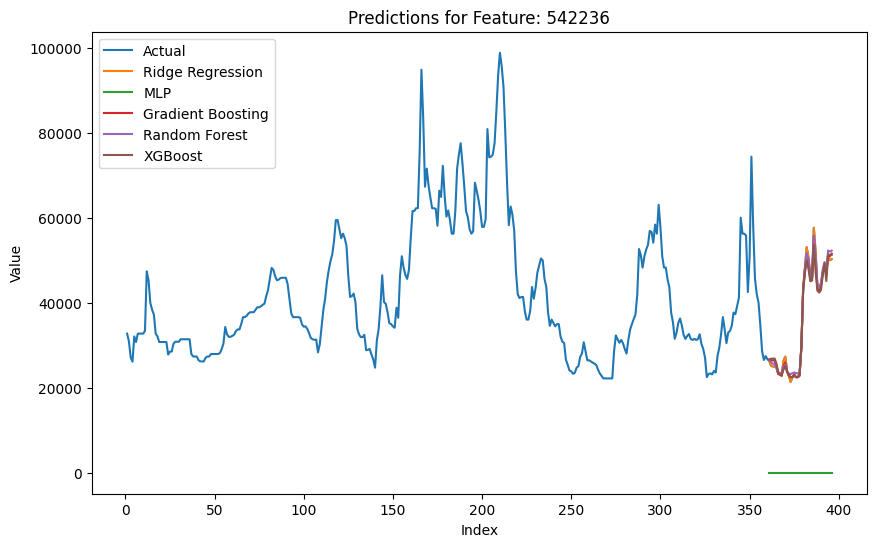

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:10:30] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Feature: 67321
Ridge Regression: Accuracy = 94.93%
MLP: Accuracy = -28764.19%
Gradient Boosting: Accuracy = 96.83%
Random Forest: Accuracy = 95.94%
XGBoost: Accuracy = 93.49%


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:10:43] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


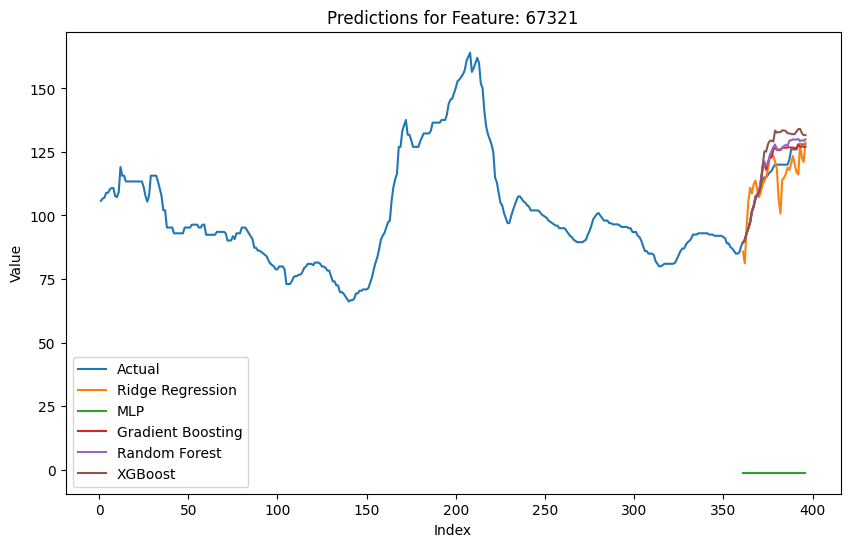

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


In [12]:
# Iterate over each feature
for feature in features:
    # Data Preparation
    X =data.iloc[:, 1:]
    a = data[feature]
    y = a.iloc[:-1]
    n = len(data)-36

    # Split data into train and test sets
    X_train = X.iloc[:n]  # Select all rows except the last 36
    y_train = y.iloc[:n]
    
    #X_test = X.iloc[n+1:] # Select the last 36 rows
    X_test = X.iloc[n:]
    y_test = y.iloc[n-1:]

    # Pre-processing Technique: Standardization and PCA
    scaler = StandardScaler()  # Standardize the features
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    pca = PCA(n_components=1)  # Dimensionality Reduction - PCA is applied
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Model training and evaluation
    accuracies = {}  # Store accuracies of different models
    
    bestAccMean = 0.0  # Initialize best mean accuracy
    
    bestAcc = 0        # Initialize best accuracy
    
    modelName = "model"  # Initialize best model name
    
    
    
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train) 
        
        # Predict the target values 
        y_pred = model.predict(X_test)  
        
        # Calculate mean accuracy
        accuracy = 100 * (1 - np.abs((y_test - y_pred) / y_test)).mean() 
        
        # Calculate accuracy for all 36 months 
        az = 100 * (1 - np.abs((y_test - y_pred) / y_test)) 
        
        # Extract the last 36 months
        last_36_months = data.index[-36:]


        # Update best accuracy if current accuracy is better
        if accuracy > bestAccMean:
            bestAccMean = accuracy
            bestAcc = az
            modelName = y_pred
        
        # Store accuracy in the dictionary
        accuracies[name] = accuracy

    # Print accuracies for each model
    print(f"Feature: {feature}")
    for name, accuracy in accuracies.items():
        print(f"{name}: Accuracy = {accuracy:.2f}%")

    # Visualize the results
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data[feature], label='Actual')  # Plot vs. actual values
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        plt.plot(data.index[-36:], y_pred, label=name)  # Plot vs. predicted values for each model
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title(f'Predictions for Feature: {feature}')
    plt.legend()
    plt.show()

    
    # Save results to Excel
    # Initialize best predicted values
    bestAccuracy = y_pred   
    
    df = pd.DataFrame({
        'Year': last_36_months,
        'Target Values': y_test, 
        'Predicted Values': modelName,
        'Accuracy': bestAcc
    })
    df.to_excel(feature + ".xlsx", index=False)

# Identify the best model based on highest accuracy
best_model = max(accuracies, key=accuracies.get)
print(f"The best model is: {best_model} with an accuracy of {accuracies[best_model]:.2f}%")
